# Week 2
## Part 1
Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?

If a network has many connections it can still be sparse if there are many nodes in the network. A network where every node has 10.000 connections which i would say is a lot, will still be sparse in a setting where N = 1.000.000. 

In a real world scenario i.e. DTU: Each student will know hundres of other students and the same goes for the professors. But when you compare this to the total student base of (N=4000??) this will still be a sparse network. Here the average degree <k> is high but compared to the total number of possible connections N-1 this is sparse.

## Part 2: Exercises using the NetworkX library
Exercises:

- Go to NS Section 2.12: Homework, then
  - Write the solution exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
  - Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use NetworkX, but simple pen and paper).
  - Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook. Important note: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks).
    - Note: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).


**Königsberg Problem**
- Which of the icons in Image 2.19 can be drawn without raising yourpencil from the paper, and without drawing any line more than once? Why?

This is called a eulearian path - and a graph that has these capabilities is a eulearian graph.

Every node should be connected. 
You cannot visit every edge in a graph exactly once if there's more than two nodes having an odd degree. The two nodes will have to be the starting node, and the end node. 

+ Figure A has these capabilities. 
+ Figure B has 4 nodes that has an uneven degree, and therefore no trail can be made.
+ Figure C can, this is because all nodes have even degree, and therefore you have to enter and leave a node, and the graph is connected, and you therefore will return to the same node you start in, and create a wulearian circut. 
+ Figure D will be possible as only two nodes have uneven dehgree. 

**Exercise 2.3 - 'Graph representation'** from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use NetworkX, but simple pen and paper).


*Construct for the networks (a) and (b) in Image 2.20.*

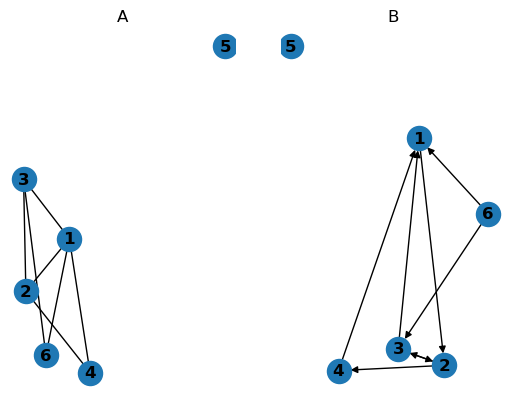

In [ ]:
# constructing the network (a) and (b) in Image 2.20

import networkx as nx
import matplotlib.pyplot as plt
A = nx.Graph()
B = nx.DiGraph()

list_of_edges_A = [(1, 2), (1,3), (1,4), (1,6), (2, 3), (2,4), (3, 6)]
list_of_edges_B = [(1,2), (2,3), (2,4), (3,2), (3,1), (4,1), (6,1), (6,3)]

A.add_edges_from(list_of_edges_A)
A.add_node(5)

B.add_edges_from(list_of_edges_B)
B.add_node(5)


subax1 = plt.subplot(121)
nx.draw(A, with_labels=True, font_weight='bold')
subax1.set_title("A")

subax2 = plt.subplot(122)
nx.draw(B, with_labels=True, font_weight='bold')
subax2.set_title("B")
plt.show()

*The corresponding adjacency matrices.*

In [16]:
Adjecency_matrix_A = nx.adjacency_matrix(A).todense()
Adjecency_matrix_B = nx.adjacency_matrix(B).todense()

print("Adjecency matrix A:\n", Adjecency_matrix_A)
print("Adjecency matrix B:\n", Adjecency_matrix_B)

Adjecency matrix A:
 [[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]
Adjecency matrix B:
 [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]


*The corresponding link lists.*
- These are made above in python

*Determine the average clustering coefficient of the network shown in Image 2.20a*

$$
C_i = \frac{2L_i}{k_i (k_i-1)}
$$

where $L_i$ represents the number of links between the $k_i$ (degree of node $i$) neighbors of node i. 

The average clustering coefficient, 〈C〉
$$
〈C〉=\frac{1}{N} \sum_N C_i
$$

In [22]:
# For network A:
degrees_A = A.degree()
print("Degrees of nodes in A:", degrees_A)

# the average clustering coefficient of the network A
avg_clustering_A = nx.average_clustering(A)
print("Average clustering coefficient of A:", avg_clustering_A)
print("Average clustering coefficient of B:", nx.average_clustering(B))

Degrees of nodes in A: [(1, 4), (2, 3), (3, 3), (4, 2), (6, 2), (5, 0)]
Average clustering coefficient of A: 0.6388888888888888
Average clustering coefficient of B: 0.32222222222222224


*If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?*


In [ ]:
A_flip = nx.relabel_nodes(A, {5:6, 6:5})


*What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?*

The adjecency matrix gives a quicker look at which nodes are connected. or at least a more structural look. The list can be hard to get an overview, and therefore hard to find if an two nodes are adjecent. Because you cannot have a lookup, but have to scan through the entire list to see if the pair is represented. 

But it is not necessaraly more information, it is just easier access to the same information.

In an adjecency matrix you can use sums of rows and col to see the degrees of the nodes. So there is some convenience of having the graph represented as a matrix and not a list.



In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

In [24]:
import numpy as np
# Get adjacency matrix as a NumPy array
Adj_A = nx.to_numpy_array(A, nodelist=sorted(A.nodes()))
Adj_B = nx.to_numpy_array(B, nodelist=sorted(B.nodes()))

# Compute A^3
A3 = np.linalg.matrix_power(Adj_A, 3)
B3 = np.linalg.matrix_power(Adj_B, 3)

# Number of walks of length 3 from 1 to 3
num_walks_A_1_to_3 = A3[0, 2]  # Node 1 is index 0, Node 3 is index 2
num_walks_B_1_to_3 = B3[0, 2]
print("Number of paths of length 3 from node 1 to node 3 in A:", int(num_walks_A_1_to_3))
print("Number of paths of length 3 from node 1 to node 3 in B:", int(num_walks_B_1_to_3))

Number of paths of length 3 from node 1 to node 3 in A: 7
Number of paths of length 3 from node 1 to node 3 in B: 0


*With the help of a computer, count the number of cycles of length 4 in both networks.*

**Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.**
- Important note: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks).

*Consider the bipartite network of Image 2.21*

- Construct its adjacency matrix. Why is it a block-diagonal matrix?
- Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.
- Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.
- Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?



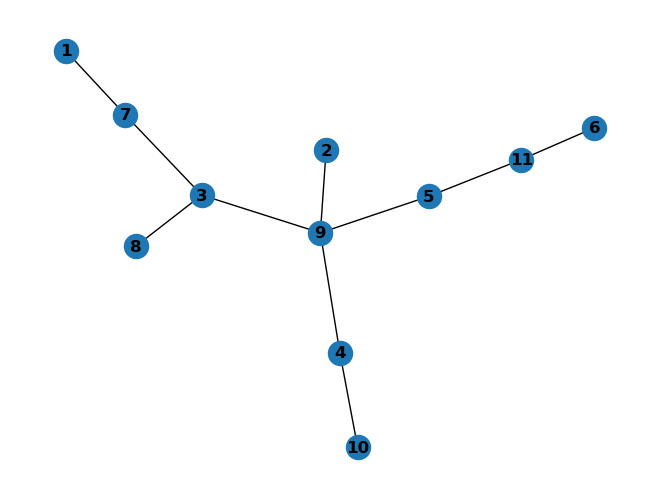

Adjecency matrix G:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]
node list: [1, 7, 2, 9, 3, 8, 4, 10, 5, 11, 6]
sorted node list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
# Construct its adjacency matrix. Why is it a block-diagonal matrix?
G = nx.Graph()
list_of_edges_G = [(1,7),(2,9),(3,7),(3,8),(3,9),(4,9),(4,10),(5,9),(5,11),(6,11)]

G.add_edges_from(list_of_edges_G)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()
# Adjecency matrix
Adj_G = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
print("Adjecency matrix G:\n", Adj_G)

print("node list:", G.nodes())
# sort the nodes of G to ensure consistent ordering
sorted_nodes = sorted(G.nodes())
print("sorted node list:", sorted_nodes)



*Why is it a anti-block-diagonal matrix? (all elements are away from the diagonal blocks).*
Because nodes 1-6 are not connected. And the same goes for 7-11. 


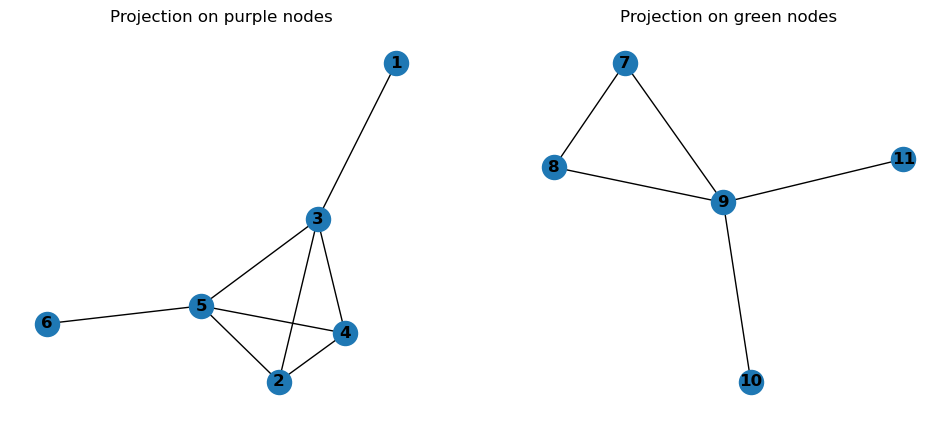

Adjecency matrix of projection on purple nodes:
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]
Adjecency matrix of projection on green nodes:
 [[0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [35]:
# Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.

# Projection on purple nodes
purple_nodes = [1,2,3,4,5,6]
green_nodes = [7,8,9,10,11]
A_purple = nx.bipartite.projected_graph(G, purple_nodes)
A_green = nx.bipartite.projected_graph(G, green_nodes)

# draw the projections
plt.figure(figsize=(12, 5))
plt.subplot(121)
nx.draw(A_purple, with_labels=True, font_weight='bold')
plt.title("Projection on purple nodes")
plt.subplot(122)
nx.draw(A_green, with_labels=True, font_weight='bold')
plt.title("Projection on green nodes")
plt.show()

Adj_purple = nx.to_numpy_array(A_purple, nodelist=sorted(A_purple.nodes()))
Adj_green = nx.to_numpy_array(A_green, nodelist=sorted(A_green.nodes()))

print("Adjecency matrix of projection on purple nodes:\n", Adj_purple)
print("Adjecency matrix of projection on green nodes:\n", Adj_green)

Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

In [38]:
# average degree of the purple nodes
degree_purple = G.degree(purple_nodes)
print("Degrees of purple nodes:", list(degree_purple))
avg_degree_purple = sum(dict(degree_purple).values()) / len(purple_nodes)
print("Average degree of purple nodes:", avg_degree_purple)

degree_green = G.degree(green_nodes)
print("Degrees of green nodes:", list(degree_green))
avg_degree_green = sum(dict(degree_green).values()) / len(green_nodes)
print("Average degree of green nodes:", avg_degree_green)

Degrees of purple nodes: [(1, 1), (2, 1), (3, 3), (4, 2), (5, 2), (6, 1)]
Average degree of purple nodes: 1.6666666666666667
Degrees of green nodes: [(7, 2), (8, 1), (9, 4), (10, 1), (11, 2)]
Average degree of green nodes: 2.0


Calculate the average degree in each of the two network projections.

In [41]:
degree_purple_project = A_purple.degree
print("Degrees of purple projection:", list(degree_purple_project))
avg_degree_purple_project = sum(dict(degree_purple_project).values()) / len(purple_nodes)
print("Average degree of purple projection:", avg_degree_purple_project)


print("Average degree of green projection:", sum(dict(A_green.degree).values()) / len(green_nodes))



Degrees of purple projection: [(1, 1), (2, 3), (3, 4), (4, 3), (5, 4), (6, 1)]
Average degree of purple projection: 2.6666666666666665
Average degree of green projection: 2.0


Is it surprising that the values are different from those obtained in point (c)?